# **Computação Visual**
*João Pedro Bianchini Ramos - 32087411*

*Victor Costa Nova Alexandre - 32052960*

*Lucas Tonin Leite - 32089759*


# Exercícios

## **1.**
Realizar a limiarização de uma imagem usando Python e scikit-image.

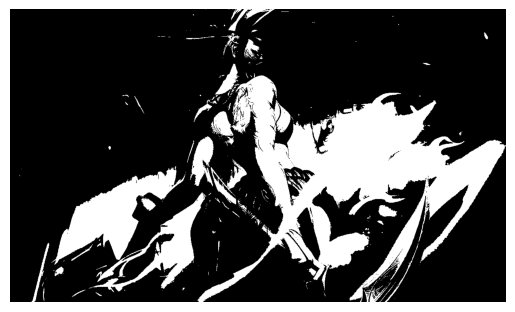

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray

# Carregar a imagem
image = io.imread('Akali_0.jpg')

# Converter a imagem para escala de cinza
gray_image = rgb2gray(image)

# Calcular o valor de limiar usando o método de Otsu
thresh = threshold_otsu(gray_image)

# Aplicar o limiar para binarizar a imagem
binary_image = gray_image > thresh

# Exibir a imagem binarizada
plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.show()

## **2.**

Plotar o histograma de uma imagem tons de cinza usando Python, scikit-image e matplotlib.


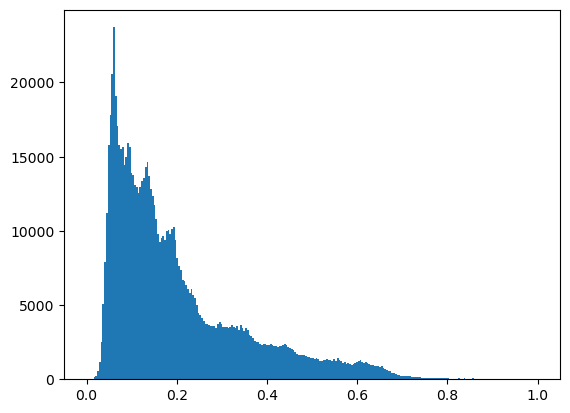

In [4]:
from skimage import io
import matplotlib.pyplot as plt

img = io.imread('Akali_0.jpg', as_gray=True)

plt.hist(img.ravel(), bins=256, range=(0, 1))
plt.show()

## **3.**

Plotar o histograma de uma imagem colorida (um histograma por canal de cor) usando Python, scikit-image e matplotlib.

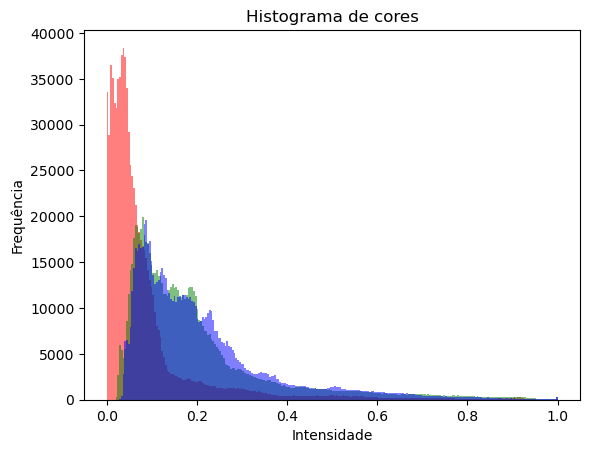

In [8]:
import matplotlib.pyplot as plt
from skimage import io, color

img = io.imread('Draven.png')
img_rgb = color.rgba2rgb(img)
red_channel = img_rgb[:,:,0]
green_channel = img_rgb[:,:,1]
blue_channel = img_rgb[:,:,2]
plt.hist(red_channel.ravel(), bins=256, color='red', alpha=0.5)
plt.hist(green_channel.ravel(), bins=256, color='green', alpha=0.5)
plt.hist(blue_channel.ravel(), bins=256, color='blue', alpha=0.5)
plt.title('Histograma de cores')
plt.xlabel('Intensidade')
plt.ylabel('Frequência')
plt.show()

## **4.**
Equalizar o histograma de uma imagem usando Python e scikit-image.

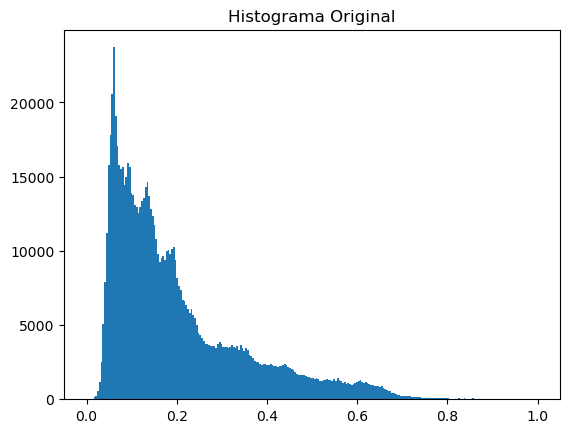

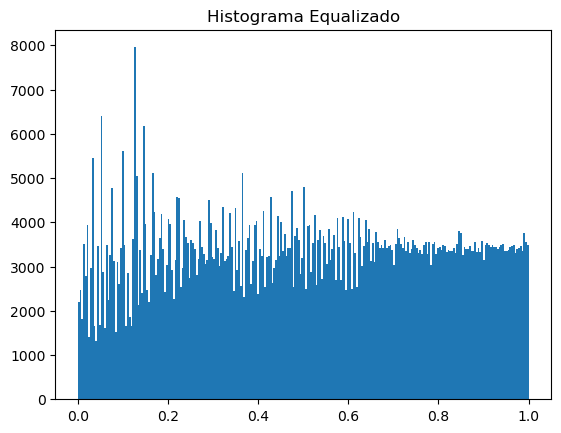

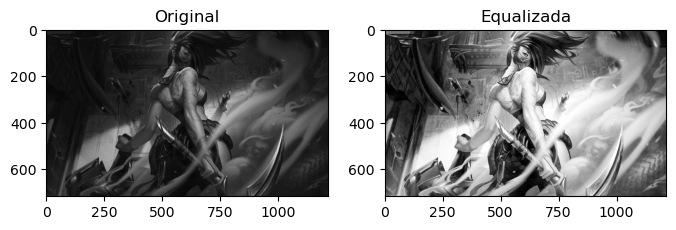

In [3]:
import matplotlib.pyplot as plt
from skimage import io, exposure


image = io.imread('Akali_0.jpg', as_gray=True)

plt.hist(image.ravel(), bins=256, range=(0, 1))
plt.title('Histograma Original')
plt.show()

eq_image = exposure.equalize_hist(image)

plt.hist(eq_image.ravel(), bins=256, range=(0, 1))
plt.title('Histograma Equalizado')
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(eq_image, cmap='gray')
ax[1].set_title('Equalizada')

plt.show()

## **5.**

Detectar (concluir) que uma foto está subexposta ou que está superexposta, analisando o histograma.

C:\Users\Victor\anaconda3\lib\site-packages\skimage\_shared\utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


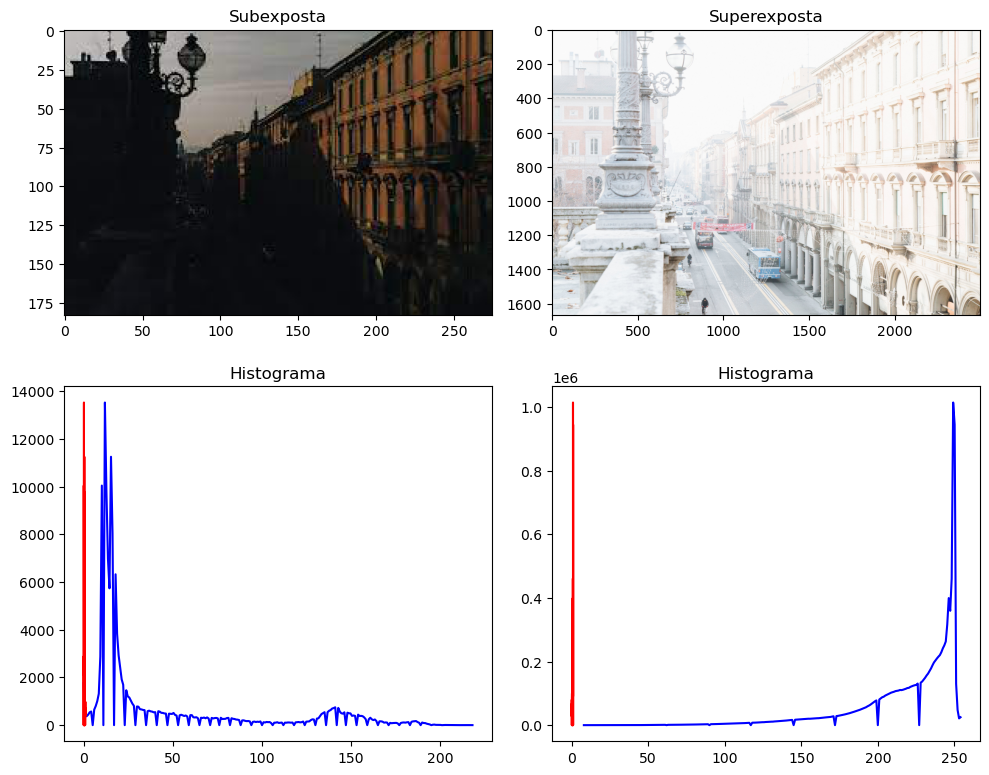

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, exposure

img_subexposta = io.imread('imag.jpg')
img_superexposta = io.imread('imag2.jpg')

img_subexposta_eq = exposure.equalize_hist(img_subexposta)
img_superexposta_eq = exposure.equalize_hist(img_superexposta)

hist_subexposta, bins_subexposta = np.histogram(img_subexposta.flatten(), bins=256)
hist_subexposta_eq, bins_subexposta_eq = np.histogram(img_subexposta_eq.flatten(), bins=256)

hist_superexposta, bins_superexposta = np.histogram(img_superexposta.flatten(), bins=256)
hist_superexposta_eq, bins_superexposta_eq = np.histogram(img_superexposta_eq.flatten(), bins=256)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].imshow(img_subexposta, cmap='gray')
axs[0, 0].set_title('Subexposta')
axs[1, 0].plot(bins_subexposta[:-1], hist_subexposta, color='b')
axs[1, 0].plot(bins_subexposta_eq[:-1], hist_subexposta_eq, color='r')
axs[1, 0].set_title('Histograma')

axs[0, 1].imshow(img_superexposta, cmap='gray')
axs[0, 1].set_title('Superexposta')
axs[1, 1].plot(bins_superexposta[:-1], hist_superexposta, color='b')
axs[1, 1].plot(bins_superexposta_eq[:-1], hist_superexposta_eq, color='r')
axs[1, 1].set_title('Histograma')

plt.tight_layout()
plt.show()

## **6.**
Detectar (concluir) se uma imagem está com baixo contraste ou alto contraste, analisando o histograma.

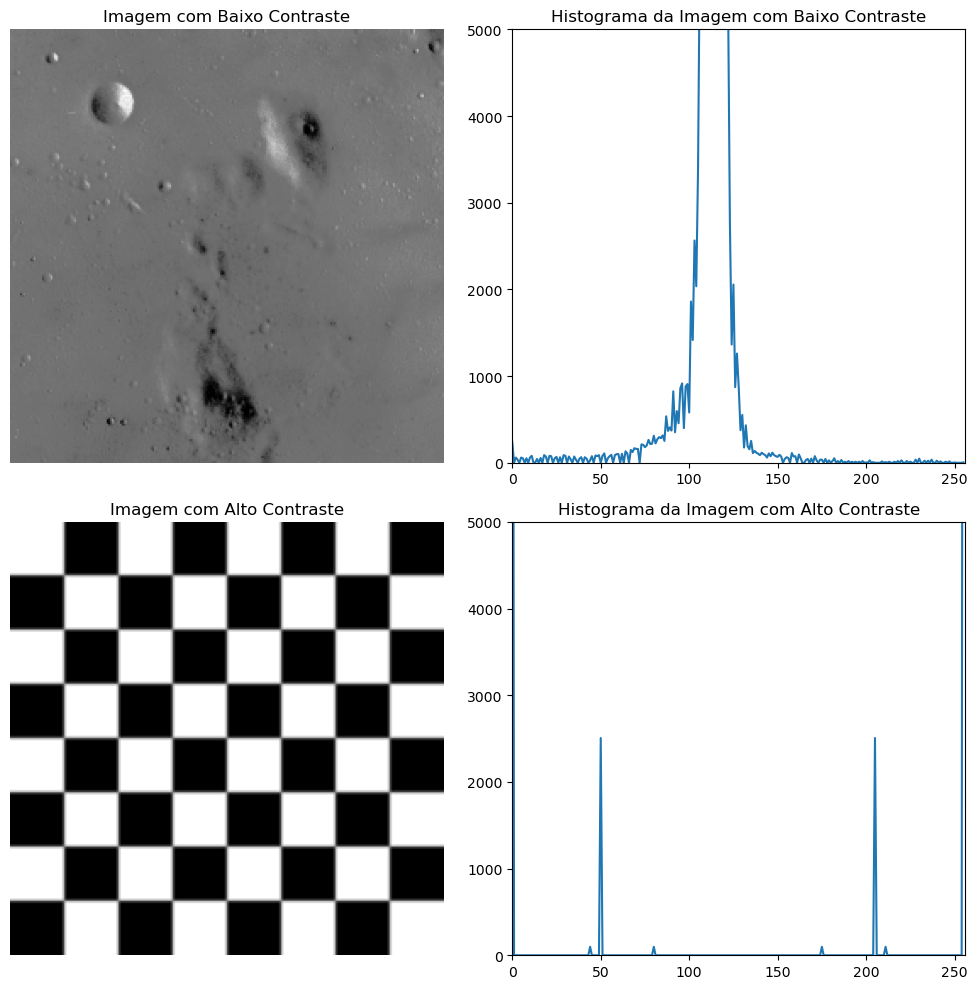

In [6]:
import numpy as np
from skimage import data, exposure, io
import matplotlib.pyplot as plt

image_low_contrast = data.moon()

image_low_contrast_equalized = exposure.equalize_adapthist(image_low_contrast/np.max(np.abs(image_low_contrast)), clip_limit=0.03)

hist_low_contrast, hist_centers_low_contrast = exposure.histogram(image_low_contrast)

image_high_contrast = data.checkerboard()

image_high_contrast_equalized = exposure.equalize_adapthist(image_high_contrast/np.max(np.abs(image_high_contrast)), clip_limit=0.03)

hist_high_contrast, hist_centers_high_contrast = exposure.histogram(image_high_contrast)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(image_low_contrast, cmap='gray')
ax[0].set_title('Imagem com Baixo Contraste')
ax[0].axis('off')

ax[1].plot(hist_centers_low_contrast, hist_low_contrast)
ax[1].set_title('Histograma da Imagem com Baixo Contraste')
ax[1].set_xlim([0, 256])
ax[1].set_ylim([0, 5000])

ax[2].imshow(image_high_contrast, cmap='gray')
ax[2].set_title('Imagem com Alto Contraste')
ax[2].axis('off')

ax[3].plot(hist_centers_high_contrast, hist_high_contrast)
ax[3].set_title('Histograma da Imagem com Alto Contraste')
ax[3].set_xlim([0, 256])
ax[3].set_ylim([0, 5000])

plt.tight_layout()

plt.show()

## **Referências Bibliográficas**

- Exercício 1 - https://www.cbpf.br/cat/pdsi/pdf/ProcessamentoImagens.PDF

- Exercício 2 - https://medium.com/data-hackers/equaliza%C3%A7%C3%A3o-de-histograma-em-python-378830368d60
- Exercício 3 - http://www.ic.uff.br/~aconci/aula-2-2015-AI.pdf

- Exercício 4 - SCIKIT-IMAGE. Disponível em: https://scikit-image.org/. Accesso em: 24 mar. 2023.

GONZALEZ, R. C.; WOODS, R. E. Processamento Digital de Imagens. 3ª ed. São Paulo: Editora Pearson Prentice Hall, 2010.


